<a href="https://colab.research.google.com/github/kazukiminemura/rock_paper_scissors_colab/blob/main/rock_paper_scissors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# rock paper scissors model with tensorflow-v2

!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE
!ls -a datasets

fatal: destination path 'datasets' already exists and is not an empty directory.
rm: cannot remove 'datasets/LICENSE': No such file or directory
.  ..  choki  gu  pa


In [29]:
!ls datasets -a

.  ..  choki  gu  pa


In [30]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


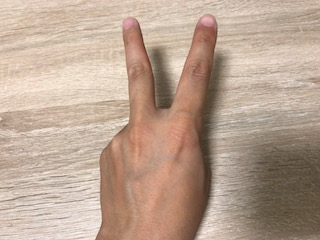

In [31]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [32]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [33]:
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [34]:
dataset_original_dir = "datasets"
dataset_root_dir = "target_datasets"

In [35]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-03 16:23:33--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py.1’

split_train_val.py. 100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-03 16:23:33 (36.0 MB/s) - ‘split_train_val.py.1’ saved [2683/2683]



In [36]:
import split_train_val

In [37]:
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67)

target_datasetsis already created.
target_datasets/trainis already created.
target_datasets/valis already created.
target_datasets/train/guis already created.
target_datasets/val/guis already created.
target_datasets/train/pais already created.
target_datasets/val/pais already created.
target_datasets/train/chokiis already created.
target_datasets/val/chokiis already created.
datasets/gu copy is done
datasets/pa copy is done
datasets/choki copy is done
processing is done


In [38]:
!rm -rf target_datasets/train/.git target_datasets/val/.git
!tree -d target_datasets -a

target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [39]:
train_dir = "target_datasets/train"
val_dir = "target_datasets/val"

In [40]:
import os
import sys
import shutil

In [41]:
backup_dir ="./model"

In [42]:
labels = [d for d in os.listdir(dataset_original_dir)
  if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)
os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt', 'w') as f:
  for label in labels:
    f.write(label + "\n")

NUM_CLASSES = len(labels)
print(f"class number={str(NUM_CLASSES)}")

class number=3


In [43]:
!cat ./model/labels.txt
!ls ./model

choki
gu
pa
labels.txt


In [44]:
### create AI model ###

In [45]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [46]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [47]:
labels = []
with open(backup_dir + '/labels.txt', 'r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)
NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [48]:
# hyper-parameters
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 8

In [49]:
# dataset preprocess
IMAGE_SIZE = 64
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [50]:
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)
validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

!ls target_datasets

Found 149 images belonging to 3 classes.
Found 94 images belonging to 3 classes.
train  val


In [51]:
# check iterated data
(image_data, label_data) = train_data.next()
print(image_data.shape)
print(label_data.shape)
print(label_data)

(8, 64, 64, 3)
(8, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


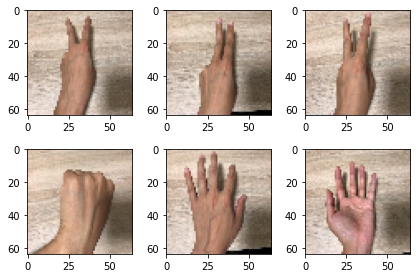

In [52]:
import matplotlib.pyplot as plt
image_numb = 6
for i in range(image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str())
  plt.imshow(image_data[i])

In [53]:
# Define AI topology

### MINIST ####
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(NUM_CLASSES))
# model.add(Activation('softmax'))

# opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
# model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])





In [54]:
### EfficientnNet ####
import tensorflow_hub as hub
feature_extractor_url = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1" #@param {type:"string"}

feature_extractor_layer = hub.KerasLayer(feature_extractor_url, 
                                         input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


In [55]:
LEARNING_RATE = 0.01
EPOCHS = 100
feature_extractor_layer.trainable = False
efficientnet_model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')])

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
efficientnet_model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [56]:
# train model
%%time
# history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)
history = efficientnet_model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=2)

Epoch 1/100
19/19 - 35s - loss: 1.0799 - accuracy: 0.3960 - val_loss: 1.0510 - val_accuracy: 0.4043 - 35s/epoch - 2s/step
Epoch 2/100
19/19 - 1s - loss: 1.0365 - accuracy: 0.4027 - val_loss: 1.0144 - val_accuracy: 0.4362 - 1s/epoch - 62ms/step
Epoch 3/100
19/19 - 2s - loss: 1.0008 - accuracy: 0.4497 - val_loss: 0.9789 - val_accuracy: 0.4894 - 2s/epoch - 86ms/step
Epoch 4/100
19/19 - 1s - loss: 0.9676 - accuracy: 0.5436 - val_loss: 0.9459 - val_accuracy: 0.5851 - 1s/epoch - 64ms/step
Epoch 5/100
19/19 - 1s - loss: 0.9348 - accuracy: 0.6711 - val_loss: 0.9142 - val_accuracy: 0.7234 - 1s/epoch - 58ms/step
Epoch 6/100
19/19 - 1s - loss: 0.9048 - accuracy: 0.7383 - val_loss: 0.8837 - val_accuracy: 0.7872 - 1s/epoch - 73ms/step
Epoch 7/100
19/19 - 2s - loss: 0.8754 - accuracy: 0.8188 - val_loss: 0.8544 - val_accuracy: 0.8511 - 2s/epoch - 105ms/step
Epoch 8/100
19/19 - 1s - loss: 0.8476 - accuracy: 0.8591 - val_loss: 0.8273 - val_accuracy: 0.8830 - 914ms/epoch - 48ms/step
Epoch 9/100
19/19 - 

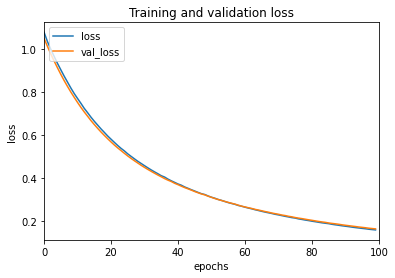

In [57]:
# visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

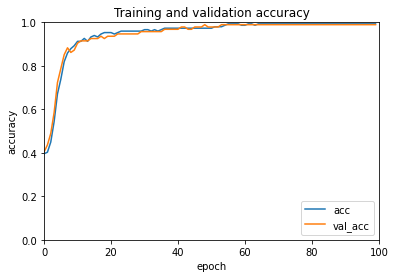

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

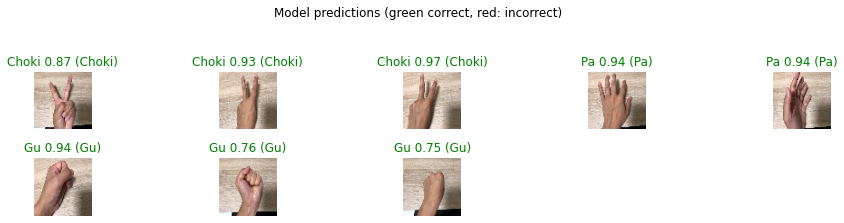

In [59]:
# model evaluation
import PIL.Image as Image

class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = True
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
(validation_image_batch, validation_label_batch) = validation_data.next()

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]

# Returns the indices of the amximum values along a given axis
predicted_batch = efficientnet_model.predict(validation_image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
# Return the maximum values along a give axis
predicted_score = np.max(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=.5)

# Display the classfication results
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # convert the range from -1 to 1to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255, np.int32))

  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + f'{predicted_score[n]: .2f} ({validation_label[n]})', color=color)
  plt.axis('off')
_ = plt.suptitle('Model predictions (green correct, red: incorrect)')

[[14. 13. 11.]
 [ 8. 10. 10.]
 [15.  5.  8.]]


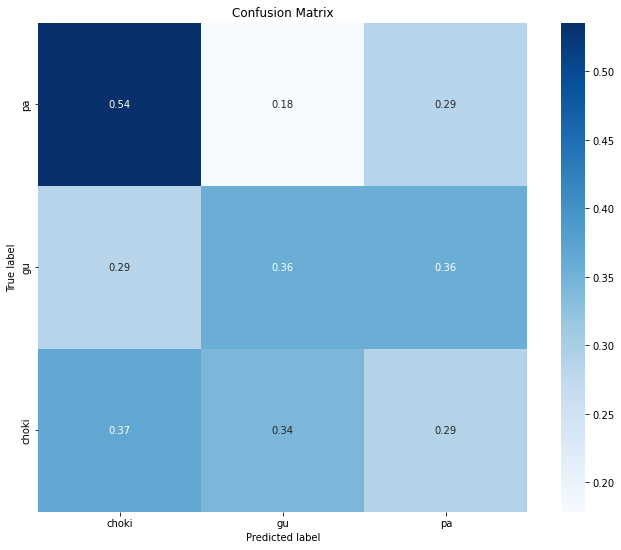

In [60]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.suffle = False
validation_data.batch_size = 1

# retrieve fth first batch from the validation data
# (validation_image_batch, validation_label_batch) = validation_data.next()
# for validation_image_batch, validation_label_batch in validation_data:
#   break

predicted = efficientnet_model.predict(validation_data, steps=validation_data.__len__())
predicrted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
cm = confusion_matrix(validation_data.classes, predicrted_classes) # counts
print(cm.astype('float'))
# print(cm.sum(axis=-1))
# print(cm.sum(axis=-1)[:, np.newaxis])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize

plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()

In [61]:
save_mode_path = os.path.join(backup_dir, 'efficientnet.h5')
efficientnet_model.save(save_mode_path)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
!cp ./model/efficientnet.h5 '/content/drive/My Drive'
!cp ./model/labels.txt '/content/drive/My Drive'

In [68]:
!ls '/content/drive/My Drive'

 2-6.xls
'Account Statment (1).gsheet'
'Account Statment.csv'
'Account Statment.gsheet'
 atomic-habits.gsheet
'Balance Sheet.gsheet'
 BigPayDataExport_181201_191217.pdf
 BigPayDataExport_190101_191217.pdf
'Colab Notebooks'
'Creation_Folders (1).jpg'
'Creations_Directories (1).jpg'
 DQ3
 efficientnet.h5
'Electronic ticket receipt, September 16 for MR KAZUKI MINEMURA.pdf'
'[ELR] SG.gjam'
 elr_sg.zip
 FLE_job
 GF.gsheet
 メンタルノート.gsheet
'Household Account'
 IMG_20211112_165411.jpg
 img-X15133245-0001.pdf
 invetst.gsheet
 Invoice_FLE_20WW43.2.gsheet
 jittyama.gdoc
 kazuki-verse1.mp4
 labels.txt
'LIFE STORY.gsheet'
'Malasia tax.gsheet'
'Malaysia eco.gsheet'
'No.15_20200627_Utilizing artificial intelligence in endoscopy a clinician s guide.pdf'
'Nobunaga no Yabou - Shouseiroku (Japan).7z'
 【PxDT】会社説明資料_0728.gdoc
 【PxDT】会社説明資料_0728.pdf
 r0201速報.xls
'RHB GIRO Online Payment (002) (1).pdf'
'RHB GIRO Online Payment (002).pdf'
'Sharing test.gsheet'
'side business 2021.gsheet'
'Spec_mirror_DEMO (14

In [70]:
git add model

SyntaxError: ignored